In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

%matplotlib inline


In [118]:
cleaned_data1 = pd.read_csv('cleaned_data1.csv')
cleaned_data2 = pd.read_csv('cleaned_data2.csv')
cleaned_data3 = pd.read_csv('cleaned_data3.csv')

combined_data = pd.concat([cleaned_data3, cleaned_data1, cleaned_data2], ignore_index=True)

combined_data.to_csv('final_data.csv', index=False)

In [119]:
df = pd.read_csv(
    'final_data.csv', 
    parse_dates=['date'],)

In [120]:
df.head()

,id,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
0,Stipan Aleksandar,2021-02-01,731,45,45,12.933333
1,Stipan Aleksandar,2021-02-02,657,45,45,11.700000
2,Stipan Aleksandar,2021-02-03,701,45,45,12.433333
3,Stipan Aleksandar,2021-02-04,612,45,45,10.950000
4,Stipan Aleksandar,2021-02-05,602,45,45,10.783333


In [121]:
df['total_time_hour'] = (df['drive_time_min'] - df['pause_should_min'] - 15) / 60

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                540 non-null    object        
 1   date              540 non-null    datetime64[ns]
 2   drive_time_min    540 non-null    int64         
 3   pause_had_min     540 non-null    int64         
 4   pause_should_min  540 non-null    int64         
 5   total_time_hour   540 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 25.4+ KB


In [123]:
df.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,540,540.000000,540.000000,540.000000,540.000000
mean,2022-03-19 22:02:40,504.637037,28.925926,33.344444,7.604877
min,2021-02-01 00:00:00,268.000000,0.000000,0.000000,4.216667
25%,2021-08-09 18:00:00,466.000000,28.000000,30.000000,7.000000
50%,2022-02-15 12:00:00,488.000000,30.000000,30.000000,7.366667
75%,2022-11-10 06:00:00,540.250000,32.000000,34.000000,8.204167
max,2023-06-30 00:00:00,731.000000,67.000000,67.000000,11.183333
std,NaN,58.803008,10.324695,6.852803,0.895355


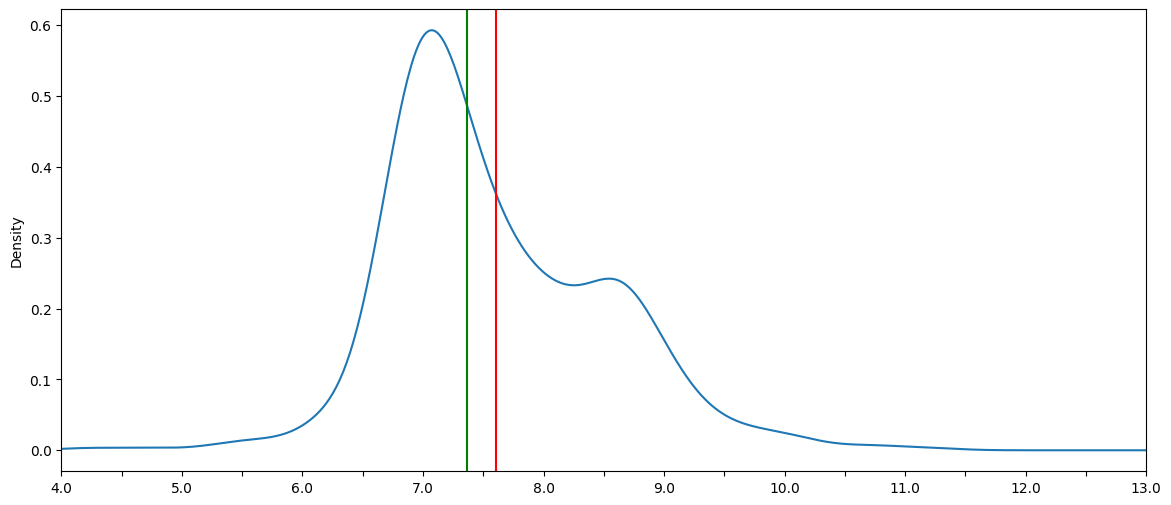

In [124]:
ax = df['total_time_hour'].plot(kind='density', figsize=(14, 6))
ax.axvline(df['total_time_hour'].mean(), color='red')
ax.axvline(df['total_time_hour'].median(), color='green')

ticks = np.arange(4, 14, 0.5)
ax.set_xticks(ticks)

detailed_ticks = [tick if tick % 1 == 0 else '' for tick in ticks]
ax.set_xticklabels(detailed_ticks)

ax.set_xlim(4, 13)

plt.show()


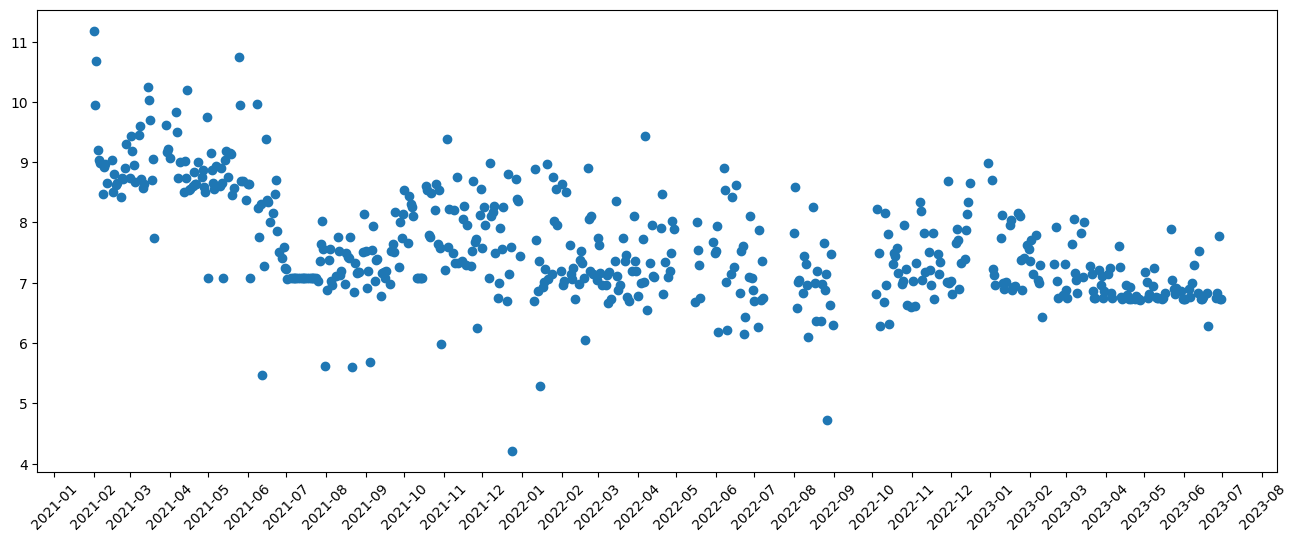

In [125]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(df['date'], df['total_time_hour'])
# Set the x-axis major locator to show months
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

# Set the x-axis date format to show only months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

plt.show()

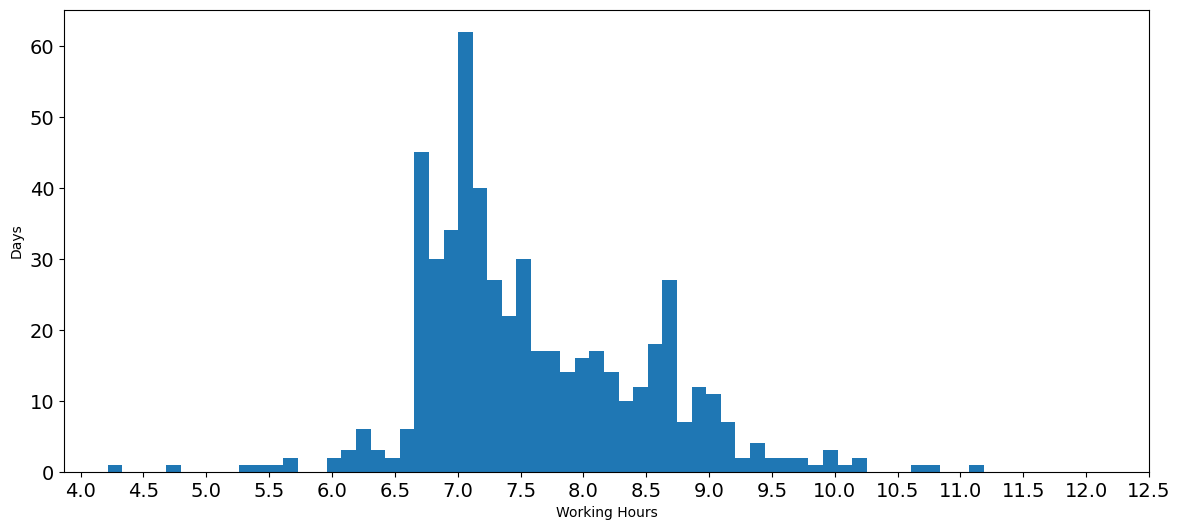

In [126]:
ax = df['total_time_hour'].plot(kind='hist', figsize=(14, 6), bins=60, fontsize=14)
ax.set_ylabel('Days')
ax.set_xlabel('Working Hours')

ticks = np.arange(4, 13, 0.5)
ax.set_xticks(ticks)

detailed_ticks = np.arange(4, 13, 0.5)
ax.set_xticklabels(detailed_ticks)

plt.show()

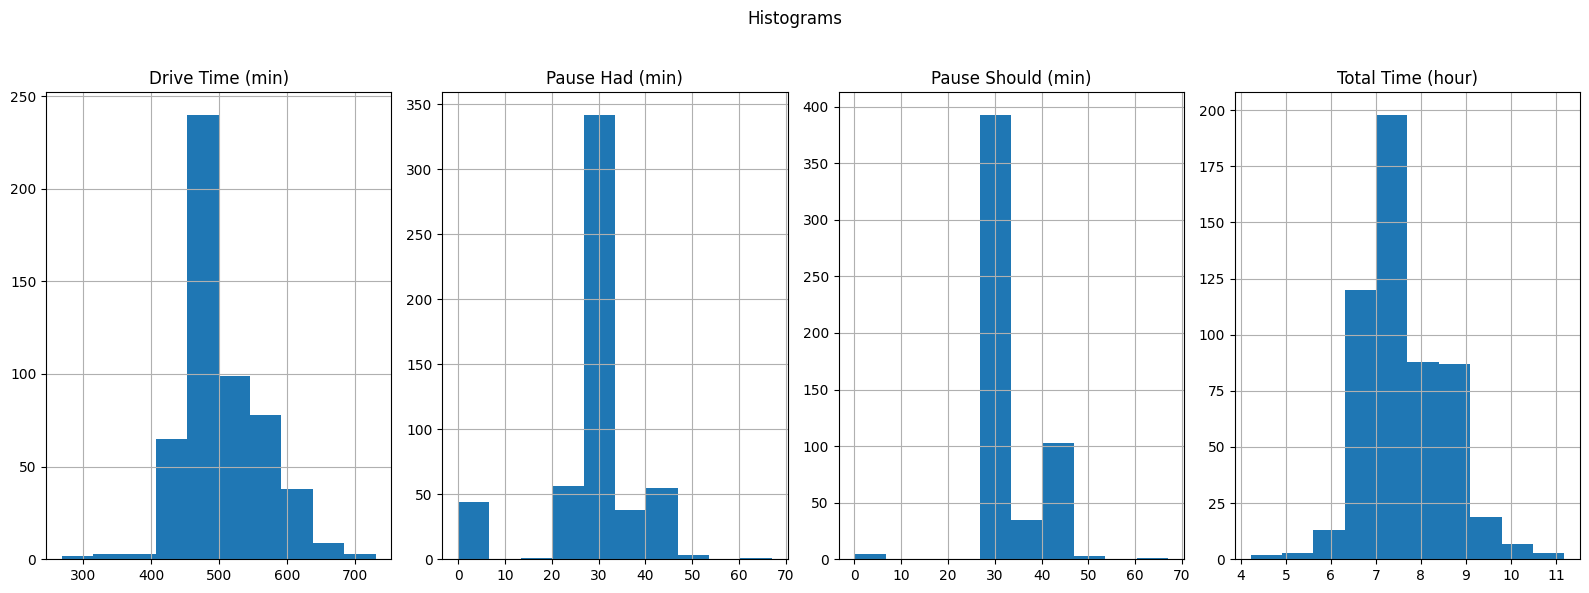

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
df.hist(column=['drive_time_min', 'pause_had_min', 'pause_should_min', 'total_time_hour'], bins=10, ax=axes)

axes[0].set_title('Drive Time (min)')
axes[1].set_title('Pause Had (min)')
axes[2].set_title('Pause Should (min)')
axes[3].set_title('Total Time (hour)')

plt.suptitle('Histograms')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## PMF of working hours
What is probability for working x hours?

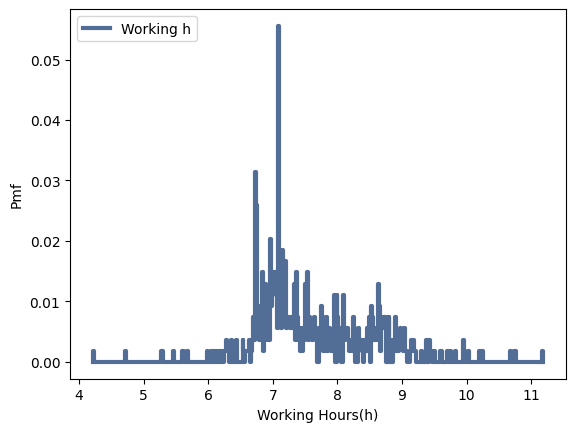

In [128]:
pmf = thinkstats2.Pmf(df.total_time_hour, label='Working h')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Working Hours(h)', ylabel='Pmf')

## CDF 
cumulative probability of working hours up to a certain value

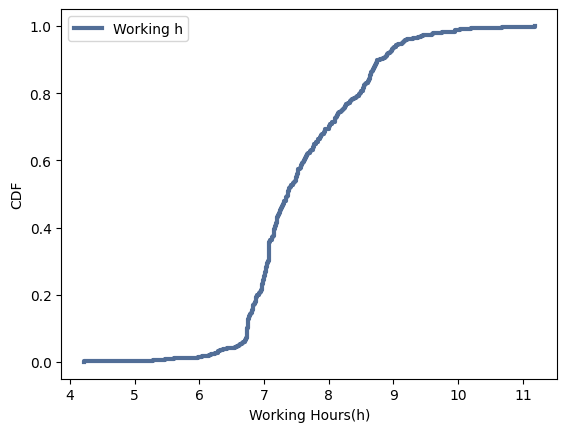

In [129]:
cdf = thinkstats2.Cdf(df.total_time_hour, label='Working h')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Working Hours(h)', ylabel='CDF', loc='upper left')


In [130]:
cdf.Prob(8)

0.7018518518518518

70% of working hours are less then 8h